In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# add the directory where fixed_income_derivatives.py is located to the system path
sys.path.append(os.path.abspath("../Files"))

# import own module
import fixed_income_derivatives_E2024 as fid

%load_ext autoreload
%autoreload 2

## Problem 1
In this problem, we will examine an interest rate payer swap where payments to the floating leg are more frequent than payments to the fixed leg. Assume that we consider an interest rate swap that pays coupons of size $ R $ to the fixed leg $ I $ times a year, pays simple LIBOR rate coupons to the floating leg $ J $ times a year, matures in exactly $ N $ years, and has a principal of $ K $. Also assume that $ M = \frac{J}{I} $ and $ N $ are positive integers. If it helps, you can think of $ I = 2 $, $ J = 4 $, and $ N = 10 $.

Initially, we will consider the interest rate swap at time of issuance at $( t = T_0 = 0 )$. Denote the times of coupon payments to the floating leg by $ T_1, T_2, \dots, T_{JN} $, corresponding to fixings announced at times $( T_0, T_1, \dots, T_{JN−1} )$, and denote the LIBOR rate announced at time $ T_i $ to be paid at time $ T_{i+1} $ by $ L(T_i, T_{i+1}) $. Finally, we assume that zero coupon bond prices $ p(t, T) $ are available for all $ T \geq 0 $.


##### (a) Find an expression for the value of the fixed leg.
The present value of the fixed leg ignoring repayment of the principal is
$$
P_{\text{fixed}} = K R \sum_{i=1}^{I \cdot N} p(t, T_{iM})(T_{iM} - T_{(i-1)M}) = S_0 R K
$$

##### (b) Find an expression for the value of the floating leg.
The present value of the floating leg ignoring repayment of the principal is
\begin{align*}
P_{\text{float}} &= \sum_{i=1}^{J\cdot N} p(t,T_i)(T_i-T_{i-1})L(T_{(i-1)},T_i)K \\ 
&= \sum_{i=1}^{J\cdot N} K[p(t,T_{i-1})p(t,T_i)L(T_{(i-1)},T_i)] \\ 
&= K [p(t,T_0) - p(t,T_{JN})]
\end{align*}

##### (c) Find an expression for the par swap rate and identify for each of the elements of the expression, if they originate from the fixed or the floating leg.
The par swap rate then can be found by setting $PV_{float} − PV_{fixed} = 0$
$$
R^*_0 = \frac{p(t,T_0) - p(t, T_{JN})}{\sum_{i=1}^{I \cdot N} p(t, T_i)(T_{iM}-T_{(i-1)M})}
$$
The numerator comes from the floating leg, and the denominator comes from the fixed leg.

##### (d) Find an expression for the accrual factor and identify for each of the elements of the expression, if they originate from the fixed or the floating leg.
The accrual factor, $S_0$ is the denominator of the par swap rate and comes solely from the fixed leg
$$
S_0 = \sum_{i=1}^{I \cdot N} p(t, T_{iM})(T_{iM} - T_{(i-1)M})
$$

##### (e) Compare the par swap rate and the accrual factor you found to the case where coupons to both the fixed and floating legs occur at the same time.
The par swap rate and the accrual factors are essentially the same whether or not the cash flows to the fixed and floating legs occur simultaneously or not.

---

Now assume that some time has passed and that $ t $ is in-between coupon dates on the floating leg. Specifically, assume that a little more than one year has passed, so that $ T_J < t < T_{J+1} $. The question is now slightly complicated by the fact that the fixing at time $ T_J $ has already been announced and that the coupon $ L(T_J , T_{J+1}) $ to the floating leg at time $ T_{J+1} $ is already known.

##### (f) Find an expression for the value of the fixed leg.
Now that time has passed, the first payment to the fixed leg occurs at time J + M and the values of the floating leg becomes
$$
P_{\text{fixed}} = K R \sum_{i=(J/M)+1}^{I \cdot N} p(t, T_{iM})(T_{iM} - T_{(i-1)M}) = S_t R K
$$

##### (g) Find an expression for the value of the floating leg.
The floating leg is now a bit different since we have to take into account the fixing and corresponding
cash flow announced at time $T_J$
\begin{align*}
P_{\text{float}} &= \sum_{i=J+1}^{J\cdot N} p(t,T_i)(T_i-T_{i-1})L(T_{(i-1)},T_i)K \\ 
&= p(t,T_{J+1})(T_{J+1}-T_J)L(T_{J},T_{J+1})K + \sum_{i=J+2}^{J\cdot N} K[p(t,T_{i-1})-p(t,T_i)] \\
&= p(t,T_{J+1})(T_{J+1}-T_J)L(T_{J},T_{J+1})K + K[p(t,T_{J+1})-p(t,T_{JN})] \\
&= K(T_{J+1}-T_J) \times (\text{ZCB price of float coupon recieved at } T_{J+1}) \\ 
&\qquad \times (\text{Floating coupon received at } T_{J+1}) \\
&\qquad + K \times (\text{ZCB price } T= \text{time of first fixing after t}) \\
&\qquad - K\times (\text{ZCB price } T= \text{time of last cash flow floating leg after t})
\end{align*} 

##### (h) Find an expression for the par swap rate and the accrual factor.
The par swap rate is yet again found be setting $PV_{float} − PV_{fixed} = 0$ but now also accounts for the floating coupon received at time $T_{J+1}$
$$
R_t^* = \frac{p(t,T_{J+1})(T_{J+1}-T_J)L(T_J,T_{J+1}) + p(t,T_{J+1})-p(t,T_{JN})}{\sum_{i=(J/M)+1}^{I \cdot N} p(t, T_{iM})(T_{iM}-T_{(i-1)M})}
$$

The accrual factor St still depends solely on the fixed leg and stems from the denominator of the
par swap rate

$$
S_t = \sum_{i=(J/M)+1}^{I \cdot N} p(t, T_{iM})(T_{iM}-T_{(i-1)M})
$$

##### (i) Find an expression for the PnL of the payer swap. Does the expression for the PnL depend on $ L(T_J , T_{J+1}) $?
The PnL of the payer swap becomes
\begin{align*}
\text{PnL} &= p(t,T_{J+1})(T_{J+1}-T_J)L(T_J,T_{J+1})K + K[p(t,T_{J+1})-p(t,T_{JN})] \\ 
&\qquad - \sum_{i=(J/M)+1}^{I \cdot N} p(t, T_{iM})(T_{iM}-T_{(i-1)M})R_0^* K \\
&= S_t K (R_t^* - R_0^*)
\end{align*}
The PnL of the payer swap depends on the principal $K$, the accrual factor $S_t$ and the change in the par swap rate. But the PnL does not depend on the first cash flow to the floating leg that was decided at time $T_J < t$ and received at time $T_{J+1}$. This means that to compute the PnL of a an interest rate swap, all we need is the par swap at time of issuance, $t = 0$, the accrual factor at time $t$ and the par swap rate at time $t$.

---


## Problem 2

For this problem, assume for simplicity that the year consists of 12 months each with exactly 30 days and that all payments occur at the end of day on the last day of the month. Also assume that there is no credit risk and that the principal of all bonds is 100.

The date today is December 30 2019, the last day of the year, and the BBA have just at 11 AM announced the 3M LIBOR fixing to be 0.01472717 and the 6M LIBOR fixing to be 0.01893706. In addition, the following bonds are traded in the market.

- i) A 3 year fixed rate bullet bond maturing December 30 2020 paying quarterly simple coupons of 4% annually and a price of 102.33689177.
- ii) A 5 year fixed rate bullet bond maturing December 30 2020 paying semi-annual simple coupons of 5% annually and a price of 104.80430234.
- iii) A 10 year fixed rate bullet bond maturing June 30 2021 paying semi-annual simple coupons of 5% annually and a price of 105.1615306.
- iv) An 8 year fixed rate bullet bond maturing June 30 2021 paying quarterly simple coupons of 6% annually and a price of 105.6581905.
- v) A 5 year fixed rate bullet bond maturing December 30 2021 paying quarterly simple coupons of 5% annually and a price of 104.028999992.
- vi) A 30 year fixed rate bullet bond maturing December 30 2021 paying annual simple coupons of 3% annually and a price of 101.82604116.

#### (a) Set up the cashflow matrix corresponding to this information.

In [2]:
# no. of bonds, no. of payments
N, M = 6, 9

# principal
K = 100 

# time in years
T = np.array([0,0.25,0.5,0.75,1,1.25,1.5,1.75,2])

# libor rates
# L_3M, L_6M = 0.01472717, 0.01893706 # rates listed in the problem set
L_3M, L_6M = 0.01570161, 0.01980204 # rates used in the solution

# price of bonds
pi = np.array([102.33689177,104.80430234,105.1615306,105.6581905,104.02899992,101.82604116])

# cash flow matrix for bonds
C = np.zeros([N,M])

# interest payment (%) * principal * payments annually (because this is in pct)
C[0,:] = [0.04*K*0.25,0.04*K*0.25,0.04*K*0.25,0.04*K*0.25,0.04*K*0.25+K,0,0,0,0]
C[1,:] = [0.05*K*0.5,0,0.05*K*0.5,0,0.05*K*0.5+K,0,0,0,0]
C[2,:] = [0.05*K*0.5,0,0.05*K*0.5,0,0.05*K*0.5,0,0.05*K*0.5+K,0,0]
C[3,:] = [0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25+K,0,0]
C[4,:] = [0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25+K]
C[5,:] = [0.03*K*1,0,0,0,0.03*K*1,0,0,0,0.03*K*1+K]

print("Cash flow matrix: \n", C)

print("Price of bonds: ", pi)

Cash flow matrix: 
 [[  1.     1.     1.     1.   101.     0.     0.     0.     0.  ]
 [  2.5    0.     2.5    0.   102.5    0.     0.     0.     0.  ]
 [  2.5    0.     2.5    0.     2.5    0.   102.5    0.     0.  ]
 [  1.5    1.5    1.5    1.5    1.5    1.5  101.5    0.     0.  ]
 [  1.25   1.25   1.25   1.25   1.25   1.25   1.25   1.25 101.25]
 [  3.     0.     0.     0.     3.     0.     0.     0.   103.  ]]
Price of bonds:  [102.33689177 104.80430234 105.1615306  105.6581905  104.02899992
 101.82604116]


#### (b) Find the vector of zero coupon prices for all the times that you can based on the above information, and find the term structure of continuously compounded zero coupon spot rates (the yield curve). Report the results and plot both curves in an appropriate diagram.

In [3]:
# set up vectors
p, r = np.ones([M]), np.zeros([M])

# ZCB prices, p[0] is 1, p[1] and p[2] are calculated using the given libor rates just announced
p[1], p[2] = 1/(1+L_3M*T[1]), 1/(1+L_6M*T[2])

# constructing the left hand side of the equation by subtracting the ZCB prices from bond prices
y = pi-p[0]*C[:,0]-p[1]*C[:,1]-p[2]*C[:,2]

# choose X containing time fixings we do not have prices for (but no longer into the future than we have assets)
x = C[:,3:]

# solving the system of equations
p[3:M] = np.linalg.solve(x,y)

# using fid nb this makes period 0 nan while the formula below makes it 0
r = fid.spot_rates_from_zcb_prices(T,p) 

# alternatively using the formula for spot rates form ZCB prices
# for i in range(1,M):
#     r[i] = -np.log(p[i])/T[i]

print("ZCB price: \n", p)
print("Spot rates: \n", r)

ZCB price: 
 [1.         0.99608995 0.99019605 0.982703   0.97393963 0.96418421
 0.95367016 0.94259166 0.93110895]
Spot rates: 
 [       nan 0.01567087 0.01970465 0.02326445 0.02640596 0.02917833
 0.03162494 0.03378407 0.03568949]


#### (c) Find 3M forward rates and plot these in the diagram from (b).

In [4]:
# using fid
f_3M = fid.forward_rates_from_zcb_prices(T,p)

# alternatively using the formula
# f_3M = np.zeros([M])
# f_3M[0] = r[0]
# for i in range(1,M):
#     f_3M[i] = -(np.log(p[i])-np.log(p[i-1]))/(T[i]-T[i-1])

print(f'3M Forward rates: \n{f_3M}')

3M Forward rates: 
[0.         0.01567087 0.02373843 0.03038404 0.03583049 0.04026783
 0.04385799 0.04673881 0.04902746]


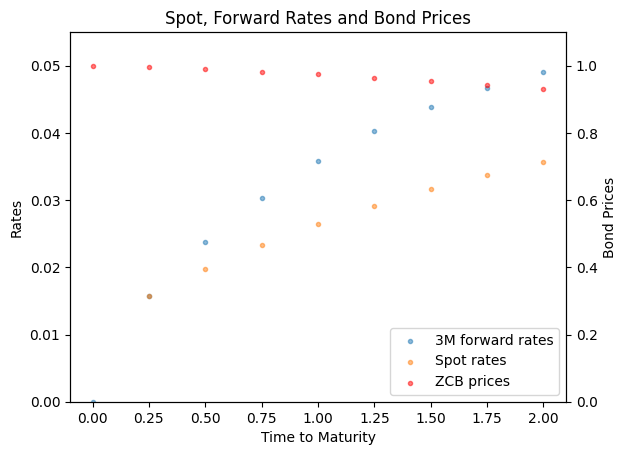

In [5]:
# Plot spot and forward rates
fig, ax1 = plt.subplots()

scatter1 = ax1.scatter(T, f_3M, label='3M forward rates', alpha=0.5, marker='.')
scatter2 = ax1.scatter(T, r, label='Spot rates', alpha=0.5, marker='.')
ax1.set_ylim([0, 0.055])
ax1.set_xlabel('Time to Maturity')
ax1.set_ylabel('Rates')

# Add bond prices to the plot on the right axis
ax2 = ax1.twinx()
scatter3 = ax2.scatter(T, p, label='ZCB prices', color='red', alpha=0.5, marker='.')
ax2.set_ylim([0, 1.1])
ax2.set_ylabel('Bond Prices')

# Combine legends
scatters = [scatter1, scatter2, scatter3]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.title('Spot, Forward Rates and Bond Prices')
plt.show()


#### (d) Find the price of a 2-year floating rate bullet note with principal 100 paying 6M LIBOR issued today.
The price of a newly issued floating rate bond will always be equal to the principal, here $K = 100$.


In [6]:
pi_float = K*p[0]

print(f"Floating rate bond price: {pi_float}")

Floating rate bond price: 100.0


#### (e) Find the par swap rate for a 2-year interest rate swap paying semi-annual fixed coupons at an annual rate $ R $ to the receiver and quarterly 3M LIBOR to the payer issued today.

In [7]:
# semiannual payment i.e. in periods 0.5, 1, 1.5, 2
# discount factor/accrual factor
R = (1-p[8])/(0.5*(p[2]+p[4]+p[6]+p[8]))

print(f"Par swap rate: {R}")

Par swap rate: 0.0357976466824958


In [ ]:
# using fid (Swap rate, Accrual factor)
fid.swap_rate_from_zcb_prices(t=0,T_n=0,T_N=2,fixed_freq='semiannual',T=T,p=p)

(0.0357976466824958, 1.9244573972631518)

#### (f) Compare the par swap rate to the forward rates you computed in (c).
The par swap rate is a weighted average of the forward rates on the floating leg which in this case is the 3M forward rates computed and shown in the plot above.

---

Time now passes and the date becomes January 30. 2020. From a god friend you now know that the price of zero coupon bond maturing on March 30. 2020 is $0.99699147$ and that the price of a zero coupon bond maturing on June 30. 2020 is $0.99088748$. Also assume that the two corresponding ZCB
bonds can be constructed and traded. Due to market fluctuations, the prices of the bonds i)-vi) are
now $[101.37241234, 102.33995192, 102.66601781, 104.16399942, 102.75471174, 98.79916103]$ and the price of the
receiver swap from e) is now $−0.1161878302683732$

#### (g) Set up a system of equations including the interest rate swap to compute zero coupon bond prices.

In [9]:
pi_ghi = np.array([101.37241234, 102.33995192, 102.66601781, 104.16399942, 102.75471174, 98.79916103])
p_0_2M_ghi, p_0_5M_ghi = 0.99699147, 0.99088748
pi_swap_ghi = -0.1161878302683732

In [10]:
# initiating new time vector
T_ghi = np.zeros([M])
# setting the new time vector to be 1/12 less than the original time vector as one month has passed
T_ghi[1:] = T[1:] - 1/12

# initiating new cash flow matrix
C_ghi = np.zeros([N,M])
C_ghi[:,1:] = C[:,1:]

In [11]:
C_swap = np.array([0,-0.25*K*L_3M-K,0.5*R*K,0,0.5*R*K,0,0.5*R*K,0,0.5*R*K+K])

print(f'The cash flows to the reciever swap: \n {C_swap}')

The cash flows to the reciever swap: 
 [   0.         -100.39254025    1.78988233    0.            1.78988233
    0.            1.78988233    0.          101.78988233]


#### (h) Solve this system of equations to find zero coupon bond prices, zero coupon bond rates, and 3M forward rates as you did in (b), and plot these.

In [12]:
p_ghi = np.ones([M])
p_ghi[0], p_ghi[1], p_ghi[2] = 1, p_0_2M_ghi, p_0_5M_ghi

# adding the new bond to the cash flow matrix
C_ghi = np.vstack([C_ghi,C_swap])

# setting up the left hand side of the equation
y = np.hstack([pi_ghi,pi_swap_ghi]) - p_ghi[1]*C_ghi[:,1] - p_ghi[2]*C_ghi[:,2]

# setting up the right hand side of the equation
x = C_ghi[:,3:]

# solving the system of equations
p_ghi[3:] = np.linalg.solve(x.T @ x,x.T @ y)
# p_ghi[3:] = np.linalg.solve(np.matmul(np.transpose(x),x),np.matmul(np.transpose(x),y))

r_ghi, f_3M_ghi = np.zeros([M]), np.zeros([M])
f_3M_ghi[0] = np.nan
for i in range(1,M):
    r_ghi[i] = -np.log(p_ghi[i])/T_ghi[i]
    f_3M_ghi[i] = -(np.log(p_ghi[i])-np.log(p_ghi[i-1]))/(T_ghi[i]-T_ghi[i-1])


In [13]:
pi_ghi

array([101.37241234, 102.33995192, 102.66601781, 104.16399942,
       102.75471174,  98.79916103])

In [14]:
y = np.hstack([pi_ghi,pi_swap_ghi])

In [15]:
(p_ghi[1]*C_ghi[:,1] - p_ghi[2]*C_ghi[:,2]).shape

(7,)

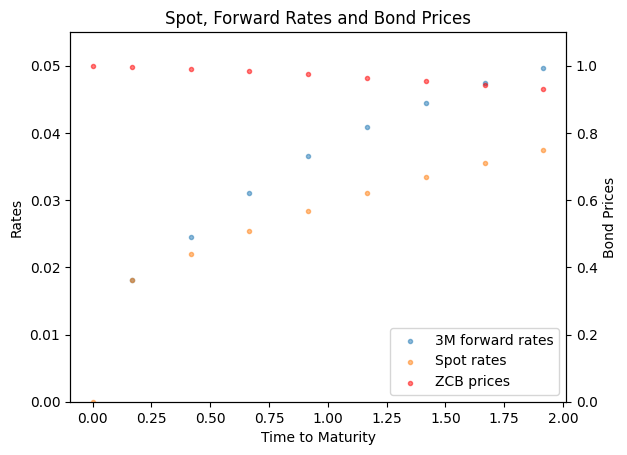

In [16]:
# Plot spot and forward rates
fig, ax1 = plt.subplots()

scatter1 = ax1.scatter(T_ghi, f_3M_ghi, label='3M forward rates', alpha=0.5, marker='.')
scatter2 = ax1.scatter(T_ghi, r_ghi, label='Spot rates', alpha=0.5, marker='.')
ax1.set_ylim([0, 0.055])
ax1.set_xlabel('Time to Maturity')
ax1.set_ylabel('Rates')

# Add bond prices to the plot on the right axis
ax2 = ax1.twinx()
scatter3 = ax2.scatter(T_ghi, p_ghi, label='ZCB prices', color='red', alpha=0.5, marker='.')
ax2.set_ylim([0, 1.1])
ax2.set_ylabel('Bond Prices')

# Combine legends
scatters = [scatter1, scatter2, scatter3]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.title('Spot, Forward Rates and Bond Prices')
plt.show()

---

Now instead assume that the price of the zero coupon bond maturing on March 30. 2020 is $0.99391543$,
that the price of a zero coupon bond maturing on June 30. 2020 is $0.98379379$, that the prices of the
6 bonds are $[100.00015573, 100.95055325, 100.77535024, 100.26763545, 100.48419302, 96.56064083]$ and that the
price of the receiver swap is $−2.04869321$.

#### (i) Check that the market is arbitrage-free.

In [17]:
print('Check that the market prices all assts using same vector of ZCB')
arb_check = x @ p_ghi[3:]
print("The arbitrage check is: ", arb_check - y)

Check that the market prices all assts using same vector of ZCB
The arbitrage check is:  [-1.98787895e+00 -2.47721870e+00 -2.47721870e+00 -2.98181843e+00
 -2.48484869e+00  1.38444619e-07  9.83169341e+01]


Since we are now in a situation where we have more assets and thus restrictions than we have free parameters, and the ZCB prices have to be estimated. This is certainly not implausible in practice and if the market is well-behaved, we should be able to recover the unique ZCB prices used to price the assets. In this case, we see that ZCB prices are positive and since the residuals $\pi−C\hat{p}$ are small, we conclude that the market is arbitrage free.

#### (j) Use OLS to estimate the zero coupon bond prices from market data.

In [18]:
pi_jk = np.array([100.00015573, 100.95055325, 100.77535024, 100.26763545, 100.48419302, 96.56064083])
p_0_2M_jk, p_0_5M_jk = 0.99391543, 0.98379379
pi_swap_jk = -2.04869321

C_zcb = np.zeros([2,8])
C_zcb[0,0], C_zcb[1,1] = 1,1
C_jk = C_ghi[:,1:]
C_jk = np.vstack([C_zcb,C_jk])
pi_jk = np.hstack([np.array([p_0_2M_jk]), np.array([p_0_5M_jk]), pi_jk, np.array([pi_swap_jk])])
p_jk = np.linalg.solve(C_jk.T @ C_jk, C_jk.T @ pi_jk)

print(f'The ZCB prices are: \n {p_jk}') # one negative value in the 5th period -> arbitrage opportunity

The ZCB prices are: 
 [ 0.99391543  0.98379379  0.97271045  0.96088848 -0.38481898  0.93574287
  2.25603492  0.90949491]


#### (k) Is the market arbitrage free? Try to find an arbitrage opportunity.

In [19]:
c_zcb = np.zeros([8])
c_zcb[4] = 1 # payoff in 5th period to replicate the ZCB
h_jk = np.linalg.solve(C_jk @ C_jk.T, C_jk @ c_zcb.T)
print(f'Portfolio replicating the March 30, 2021 ZCB: \n{np.round(h_jk,8)}') # weights for portfolio replicating the ZCB
cf_jk = h_jk.T @ C_jk
print(f'Cash flow of the replicating portfolio for March 30, 2021 ZCB: \n{cf_jk}') # all zero except 5th installment
price_jk = h_jk @ pi_jk
print(f'Price of the replicating portfolio for March 30, 2021 ZCB: \n{price_jk}') # negative price today

Portfolio replicating the March 30, 2021 ZCB: 
[-15.56953279  -0.55344623  -1.           0.9898676   -0.65745444
   0.66666667  -0.           0.15326448  -0.15508655]
Cash flow of the replicating portfolio for March 30, 2021 ZCB: 
[-1.43872539e-14 -4.82011757e-13 -1.24541247e-12  5.87575084e-15
  1.00000000e+00  1.49240685e-14 -3.35140616e-13 -2.08397170e-15]
Price of the replicating portfolio for March 30, 2021 ZCB: 
-0.38481897588427866
